In [1]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

time: 0 ns (started: 2023-05-21 22:47:54 +07:00)


In [2]:
train_ds = pd.read_csv("./train_ds_big_process.csv")
test_ds = pd.read_csv("./test_ds_big_process.csv")

time: 63 ms (started: 2023-05-21 22:47:54 +07:00)


In [3]:
X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]


time: 0 ns (started: 2023-05-21 22:47:54 +07:00)


In [4]:
from sklearn import metrics


time: 187 ms (started: 2023-05-21 22:47:54 +07:00)


In [5]:
def metric_for_evalue_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_absolute_percentage_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE = {mae}")
    print(f"MSE = {mse}")
    print(f"R2 = {r2}")
    print(f"RMSE = {rmse}")

time: 0 ns (started: 2023-05-21 22:47:55 +07:00)


In [6]:
def plot_residuals(y_test, y_pred):
    indexes = list(range(1, 150+1))[:150]
    fig, axs = plt.subplots(1, 1, figsize=(20, 6), sharey=True)
    axs.plot(indexes, y_pred[:150], label='predicted_value', color='purple')
    axs.plot(indexes, y_test[:150], label='actual_value', color='orange')
    axs.legend()
    axs.set_ylabel('Price')
    fig.suptitle('Predicted Price VS Actual Price')
    plt.show()

time: 16 ms (started: 2023-05-21 22:47:55 +07:00)


Random Forest Regressor


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

RandomForestRegressor()

MAE = 3030820.6591119654
MSE = 0.24965917183831754
R2 = 0.716203264767012
RMSE = 0.4996590555952304
time: 1.23 s (started: 2023-05-21 22:47:55 +07:00)


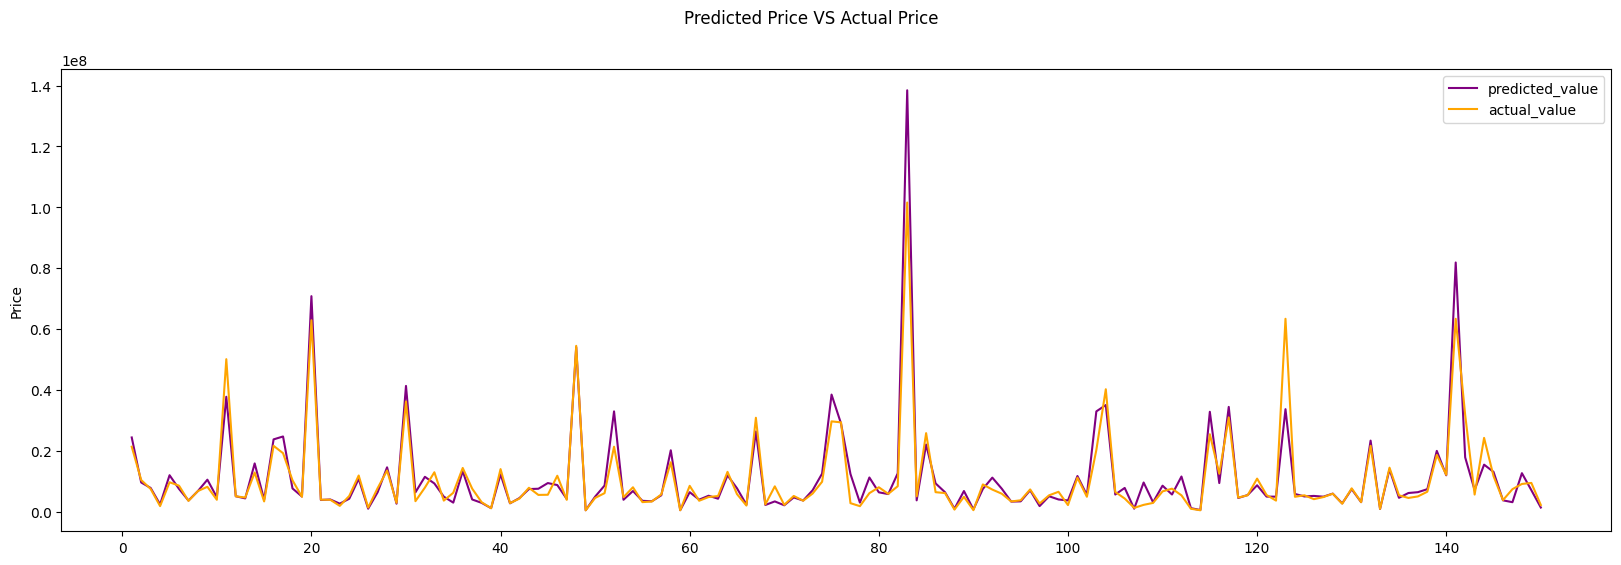

time: 281 ms (started: 2023-05-21 22:47:56 +07:00)


In [8]:
plot_residuals(y_test, y_pred)

In [9]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_pars = grid_search.best_params_

print('Best hyperparameters: ', best_pars)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
time: 2min 15s (started: 2023-05-21 22:47:56 +07:00)


RandomForestRegressor(max_depth=9, max_features='auto', min_samples_split=10,
                      random_state=0)

MAE = 3178019.99506308
MSE = 0.32367758442301
R2 = 0.7227620583584613
RMSE = 0.5689266951224999


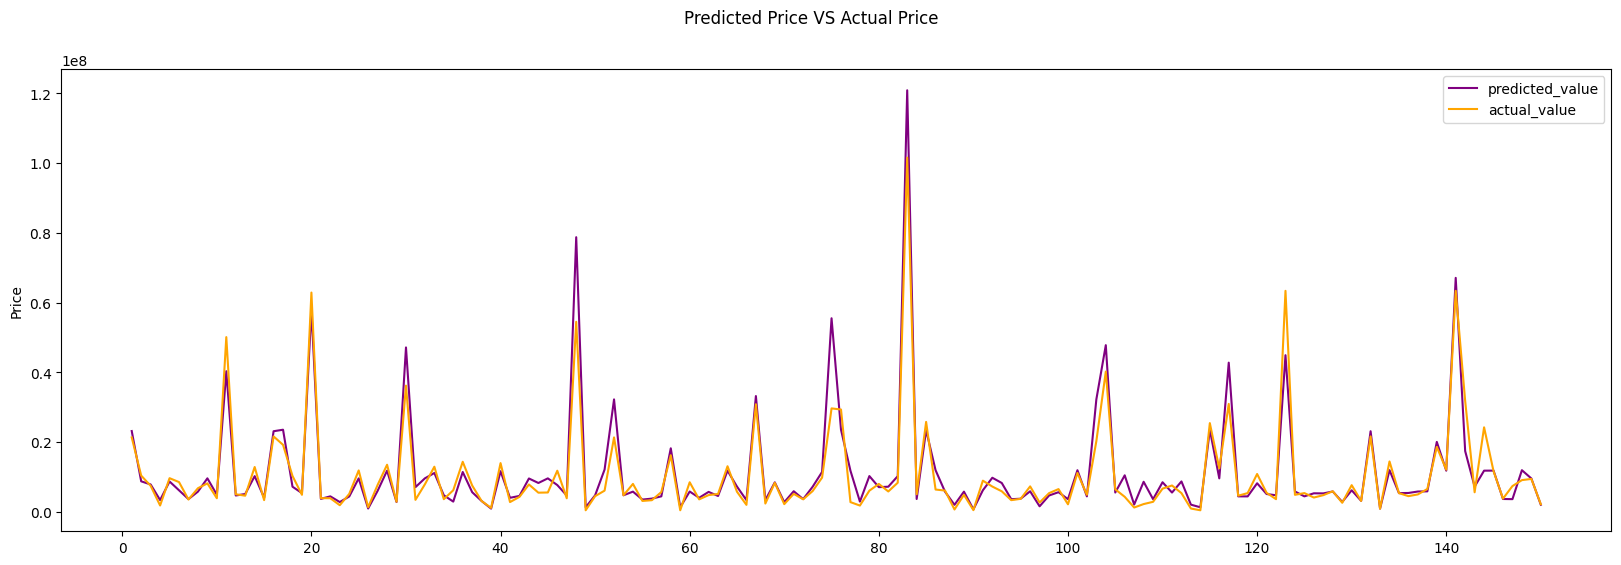

time: 1 s (started: 2023-05-21 22:50:12 +07:00)


In [10]:
rf = RandomForestRegressor(random_state=0, max_depth=best_pars['max_depth'], min_samples_split=best_pars[
                           'min_samples_split'], min_samples_leaf=best_pars['min_samples_leaf'], max_features=best_pars['max_features'])

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

Logistic Regression

LogisticRegression()

MAE = 6369211.025
MSE = 0.4914432263155915
R2 = 0.2127810032960754
RMSE = 0.7010301179803843


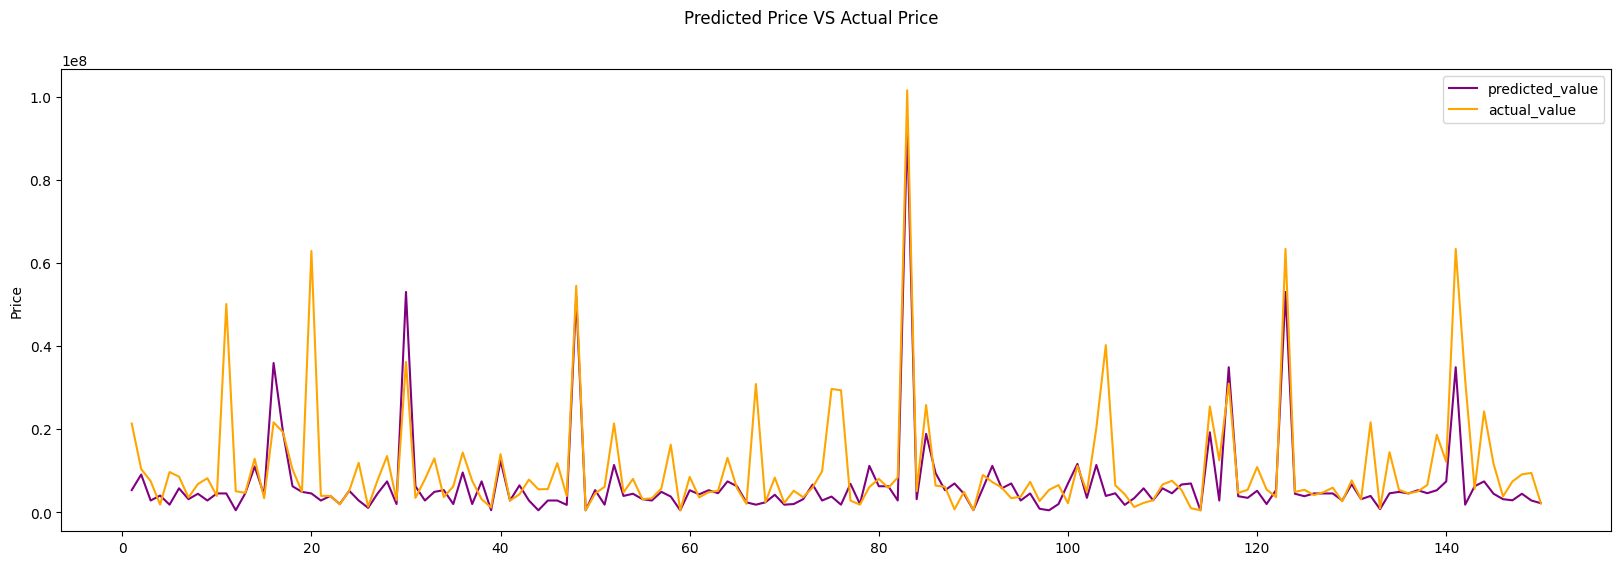

time: 1min 16s (started: 2023-05-21 22:50:13 +07:00)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)

In [ ]:
params = {"penalty": ["l1", "l2", "none"], "C": [0.01, 0.1, 1, 10, 100]}

clf = GridSearchCV(logistic, params)
clf.fit(X_train, y_train)

# clf.best_params_

c = 0.01
penalty = 'none'

LogisticRegression(C=0.01, penalty='none')

MAE = 5346661.75
MSE = 0.42860724984057075
R2 = 0.34835198008633117
RMSE = 0.6546810290825378


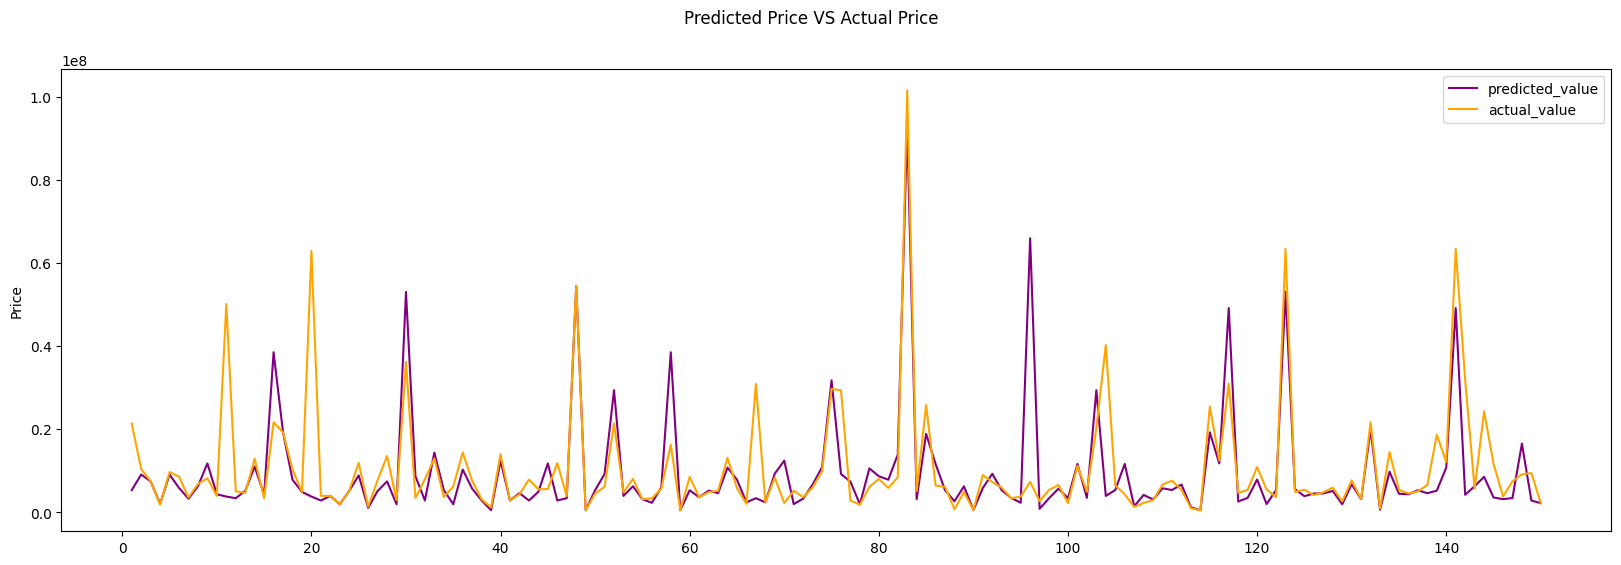

time: 1min 2s (started: 2023-05-21 22:54:09 +07:00)


In [13]:
logistic = LogisticRegression(penalty='none',C=0.01)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

metric_for_evalue_model(y_test, y_pred)

plot_residuals(y_test, y_pred)